In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("HotelCustomersDataset.xlsx")
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,0,0,1,0,0,0,0,0
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
df.duplicated().sum()
df.isna().sum()/df.shape[0]*100

ID                      0.000000
Nationality             0.000000
Age                     4.520876
DaysSinceCreation       0.000000
NameHash                0.000000
DocIDHash               0.000000
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DaysSinceLastStay       0.000000
DaysSinceFirstStay      0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoo

In [4]:
df.nunique()/df.shape[0]*100

ID                      100.000000
Nationality               0.224907
Age                       0.125613
DaysSinceCreation         1.309965
NameHash                 96.473262
DocIDHash                92.107908
AverageLeadTime           0.500060
LodgingRevenue           12.270607
OtherRevenue              5.371456
BookingsCanceled          0.007178
BookingsNoShowed          0.004785
BookingsCheckedIn         0.034693
PersonsNights             0.066994
RoomNights                0.057423
DaysSinceLastStay         1.321928
DaysSinceFirstStay        1.325517
DistributionChannel       0.004785
MarketSegment             0.008374
SRHighFloor               0.002393
SRLowFloor                0.002393
SRAccessibleRoom          0.002393
SRMediumFloor             0.002393
SRBathtub                 0.002393
SRShower                  0.002393
SRCrib                    0.002393
SRKingSizeBed             0.002393
SRTwinBed                 0.002393
SRNearElevator            0.002393
SRAwayFromElevator  

In [5]:
df = df.drop(["ID","DocIDHash","NameHash"],axis=1)

In [6]:
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
1,PRT,NaN,1095,61,280.0,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83586,IRL,47.0,0,109,327.1,277.5,0,0,1,6,...,0,0,0,0,1,0,0,0,0,0
83587,IRL,53.0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83588,IRL,85.0,0,109,981.3,9.0,0,0,1,6,...,0,0,0,0,0,1,0,0,0,0


In [7]:
df = df[df["Age"]>0]
print("MEan",df["Age"].mean())
print("median",df["Age"].median())
df["Age"] = df["Age"].fillna(df["Age"].median())

MEan 45.43314274250176
median 46.0


<ipython-input-7-ab22543f519b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = df["Age"].fillna(df["Age"].median())


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79752 entries, 0 to 83589
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           79752 non-null  object 
 1   Age                   79752 non-null  float64
 2   DaysSinceCreation     79752 non-null  int64  
 3   AverageLeadTime       79752 non-null  int64  
 4   LodgingRevenue        79752 non-null  float64
 5   OtherRevenue          79752 non-null  float64
 6   BookingsCanceled      79752 non-null  int64  
 7   BookingsNoShowed      79752 non-null  int64  
 8   BookingsCheckedIn     79752 non-null  int64  
 9   PersonsNights         79752 non-null  int64  
 10  RoomNights            79752 non-null  int64  
 11  DaysSinceLastStay     79752 non-null  int64  
 12  DaysSinceFirstStay    79752 non-null  int64  
 13  DistributionChannel   79752 non-null  object 
 14  MarketSegment         79752 non-null  object 
 15  SRHighFloor        

In [9]:
df["Nationality"].nunique()

187

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Nationality"] = le.fit_transform(df["Nationality"])


<ipython-input-10-b5a0fe8af56d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Nationality"] = le.fit_transform(df["Nationality"])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79752 entries, 0 to 83589
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           79752 non-null  int32  
 1   Age                   79752 non-null  float64
 2   DaysSinceCreation     79752 non-null  int64  
 3   AverageLeadTime       79752 non-null  int64  
 4   LodgingRevenue        79752 non-null  float64
 5   OtherRevenue          79752 non-null  float64
 6   BookingsCanceled      79752 non-null  int64  
 7   BookingsNoShowed      79752 non-null  int64  
 8   BookingsCheckedIn     79752 non-null  int64  
 9   PersonsNights         79752 non-null  int64  
 10  RoomNights            79752 non-null  int64  
 11  DaysSinceLastStay     79752 non-null  int64  
 12  DaysSinceFirstStay    79752 non-null  int64  
 13  DistributionChannel   79752 non-null  object 
 14  MarketSegment         79752 non-null  object 
 15  SRHighFloor        

In [12]:
df["DistributionChannel"].nunique(), df["MarketSegment"].nunique()

(4, 7)

In [13]:
dc = pd.get_dummies(df["DistributionChannel"])
df["Corporate"] = dc["Corporate"]
df["Direct"] = dc["Direct"]
df["Electronic Distribution"] = dc["Electronic Distribution"]
df["Travel Agent/Operator"] =  dc["Travel Agent/Operator"]
df = df.drop("DistributionChannel",axis=1)
df

<ipython-input-13-aa65297b730e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Corporate"] = dc["Corporate"]
<ipython-input-13-aa65297b730e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Direct"] = dc["Direct"]
<ipython-input-13-aa65297b730e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Corporate,Direct,Electronic Distribution,Travel Agent/Operator
0,137,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,1,0,0,0
2,43,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,57,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,1
4,57,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,87,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83,54.0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
83586,78,47.0,0,109,327.1,277.5,0,0,1,6,...,1,0,0,0,0,0,0,0,0,1
83587,78,53.0,0,0,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
83588,78,85.0,0,109,981.3,9.0,0,0,1,6,...,0,1,0,0,0,0,0,0,0,1


In [14]:
le2 = LabelEncoder()
df["MarketSegment"] = le2.fit_transform(df["MarketSegment"])

In [15]:
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Corporate,Direct,Electronic Distribution,Travel Agent/Operator
0,137,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,1,0,0,0
2,43,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,57,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,1
4,57,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,87,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83,54.0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
83586,78,47.0,0,109,327.1,277.5,0,0,1,6,...,1,0,0,0,0,0,0,0,0,1
83587,78,53.0,0,0,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
83588,78,85.0,0,109,981.3,9.0,0,0,1,6,...,0,1,0,0,0,0,0,0,0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79752 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Nationality              79752 non-null  int32  
 1   Age                      79752 non-null  float64
 2   DaysSinceCreation        79752 non-null  int64  
 3   AverageLeadTime          79752 non-null  int64  
 4   LodgingRevenue           79752 non-null  float64
 5   OtherRevenue             79752 non-null  float64
 6   BookingsCanceled         79752 non-null  int64  
 7   BookingsNoShowed         79752 non-null  int64  
 8   BookingsCheckedIn        79752 non-null  int64  
 9   PersonsNights            79752 non-null  int64  
 10  RoomNights               79752 non-null  int64  
 11  DaysSinceLastStay        79752 non-null  int64  
 12  DaysSinceFirstStay       79752 non-null  int64  
 13  MarketSegment            79752 non-null  int32  
 14  SRHighFloor           

In [17]:
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Corporate,Direct,Electronic Distribution,Travel Agent/Operator
0,137,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,1,0,0,0
2,43,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,57,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,1
4,57,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,87,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83,54.0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
83586,78,47.0,0,109,327.1,277.5,0,0,1,6,...,1,0,0,0,0,0,0,0,0,1
83587,78,53.0,0,0,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
83588,78,85.0,0,109,981.3,9.0,0,0,1,6,...,0,1,0,0,0,0,0,0,0,1


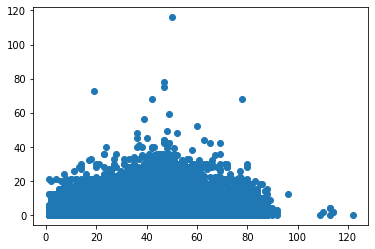

In [18]:
plt.scatter(df["Age"],df["PersonsNights"])

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import calinski_harabasz_score
inertia = []
cal = []
for k in range(2,30):
    kmn = KMeans(n_clusters=5,)
    kmn.fit(normalize(df))
    cal.append(calinski_harabasz_score(normalize(df),
                                       kmn.predict(normalize(df))))
    inertia.append(kmn.inertia_)



KeyboardInterrupt: 

In [ ]:
plt.plot(range(2,30),cal)

In [ ]:
cal.sort(reverse=True)
inertia.sort(reverse=True)

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(range(2,30),inertia)
plt.axvline(5,c="green")

plt.subplot(122)
plt.plot(range(2,30),cal)
plt.axvline(5,c="green")


# mean-shift
# DBSCAN

In [ ]:
from sklearn.cluster import MeanShift
mst = MeanShift(bandwidth=10)
lab = mst.fit_predict(df)
print(np.unique(lab))

In [ ]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=100,min_samples=5)
lab = dbs.fit_predict(df)
print(np.unique(lab))

In [ ]:
lab